In [1]:
import nilmtk

In [2]:
from nilmtk import DataSet

In [3]:
from nilmtk.utils import print_dict

In [4]:
amp = DataSet('AMPds2.h5')

In [5]:
print_dict(amp.metadata)

In [6]:
elec = amp.buildings[1].elec

In [7]:
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='AMPds', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='AMPds', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=3, building=1, dataset='AMPds', appliances=[Appliance(type='light', instance=2)])
  ElecMeter(instance=4, building=1, dataset='AMPds', appliances=[Appliance(type='light', instance=3)])
  ElecMeter(instance=5, building=1, dataset='AMPds', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=6, building=1, dataset='AMPds', appliances=[Appliance(type='unknown', instance=2)])
  ElecMeter(instance=7, building=1, dataset='AMPds', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='AMPds', appliances=[Appliance(type='unknown', instance=3)])
  ElecMeter(instance=9, building=1, dataset='AMPds', appliances=[Appliance(type='unknown', instance=4)])
  ElecMeter(instance=10, building=1, dataset='AMPds', appliances=[A

In [8]:
elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=21, building=1, dataset='AMPds') ...    dropout_rate for ElecMeterID(instance=11, building=1, dataset='AMPds') ...   

0.0

In [9]:
print("Sample Period: " + str( elec.sample_period() ))
print("Available physical quantities: " + str( elec.available_physical_quantities() ))
print("Available AC types :" + str(elec.available_ac_types('power')))
print("Duration of the measurement campaign: "+ str(elec.uptime()))

Sample Period: 60
Available physical quantities: ['voltage', 'power', 'current', 'cumulative energy', 'power factor', 'frequency']
Available AC types :['apparent', 'active', 'reactive']
Duration of the measurement campaign: 729 days 23:59:00


C:\ProgramData\Anaconda3\lib\site-packages\nilmtk\metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


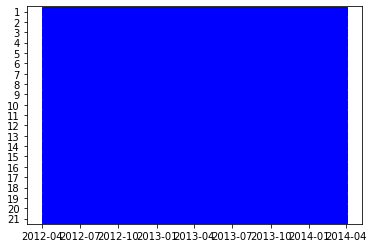

In [10]:
elec.plot_good_sections()

(<networkx.classes.digraph.DiGraph at 0x2cff6048b00>,
 <matplotlib.axes._axes.Axes at 0x2cff5f67208>)

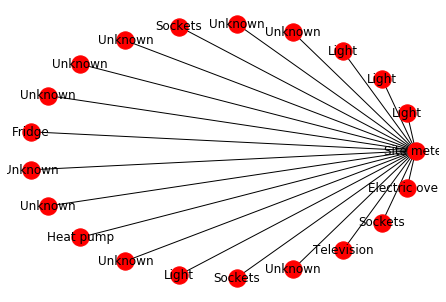

In [11]:
elec.draw_wiring_graph()

In [12]:
elec.proportion_of_energy_submetered()
#The function proportion_of_energy_submetered allows estimating the amount of submetered energy inside a dataset

Running MeterGroup.proportion_of_energy_submetered...


0.9146573111854486

In [13]:
elec.fraction_per_meter()

21/21 ElecMeter(instance=21, building=1, dataset='AMPds', appliances=[Appliance(type='electric oven', instance=1)])

(1, 1, AMPds)     0.514922
(2, 1, AMPds)     0.003918
(3, 1, AMPds)     0.012565
(4, 1, AMPds)     0.016394
(5, 1, AMPds)     0.033271
(6, 1, AMPds)     0.002704
(7, 1, AMPds)     0.000577
(8, 1, AMPds)     0.006046
(9, 1, AMPds)     0.007568
(10, 1, AMPds)    0.021275
(11, 1, AMPds)    0.022731
(12, 1, AMPds)    0.067881
(13, 1, AMPds)    0.025865
(14, 1, AMPds)    0.074558
(15, 1, AMPds)    0.005128
(16, 1, AMPds)    0.019010
(17, 1, AMPds)    0.000431
(18, 1, AMPds)    0.111456
(19, 1, AMPds)    0.021547
(20, 1, AMPds)    0.028022
(21, 1, AMPds)    0.004130
dtype: float64

20/20 ElecMeter(instance=21, building=1, dataset='AMPds', appliances=[Appliance(type='electric oven', instance=1)])

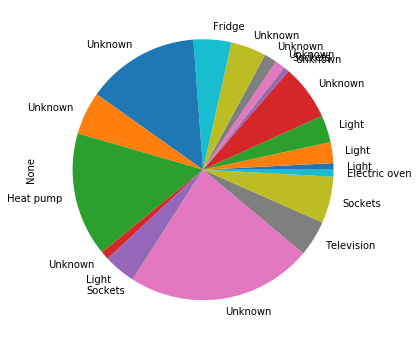

In [14]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)

fraction = elec.submeters().fraction_per_meter().dropna()

labels = elec.get_labels(fraction.index)
plt.figure(figsize=(6,6))
fraction.plot(kind='pie', labels=labels);

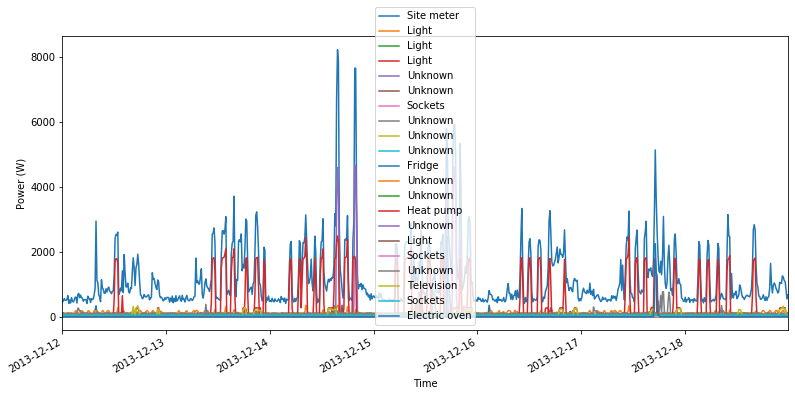

In [19]:
amp.set_window(start='2013-12-12 00:00:00', end='2013-12-19 00:00:00')
elec.plot();
plt.xlabel("Time");

Loading data for meter ElecMeterID(instance=21, building=1, dataset='AMPds')      ElecMeterID(instance=11, building=1, dataset='AMPds')     
Done loading data all meters for this chunk.


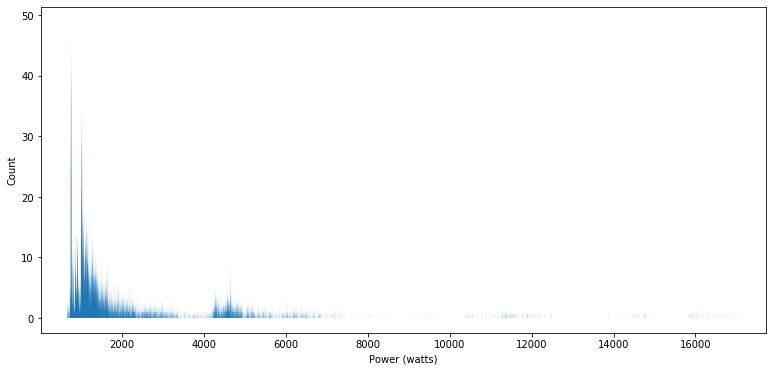

In [20]:
elec.plot_power_histogram()